<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-greyngs/blob/main/activity_weekly--4/Activity-Weekly--4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Actividad 1 - Semana 3
#### Jorge Steven Reyes - A01794421
#### Profesor: Jobish Vallikavungal Devassia
#### Ciencia y analitica de datos - 11/10/2022

## Parte 1: Ejercicio guiado 

La idea de esta actividad es aplicar PCA

In [2]:
# Empezamos importanto librerias
import pandas as pd
import numpy as np

In [25]:
# ubicacion de la bd
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# convertimos a dataframe
df = pd.read_csv(path, index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [26]:
# Debido a que PCA solo se aplica a variables numericas, es importante saber el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

Aunque el tipo de dato de las columnas X2, X3, X4 son numericas, estas contienen valores categoricos por tanto se deben eliminar, ademas de la Y que es el resultado.

In [27]:
df = df.drop(['X2', 'X3', 'X4', 'Y'], axis=1)
df.dropna(inplace = True)
df

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


Generaremos una matriz de correlacion

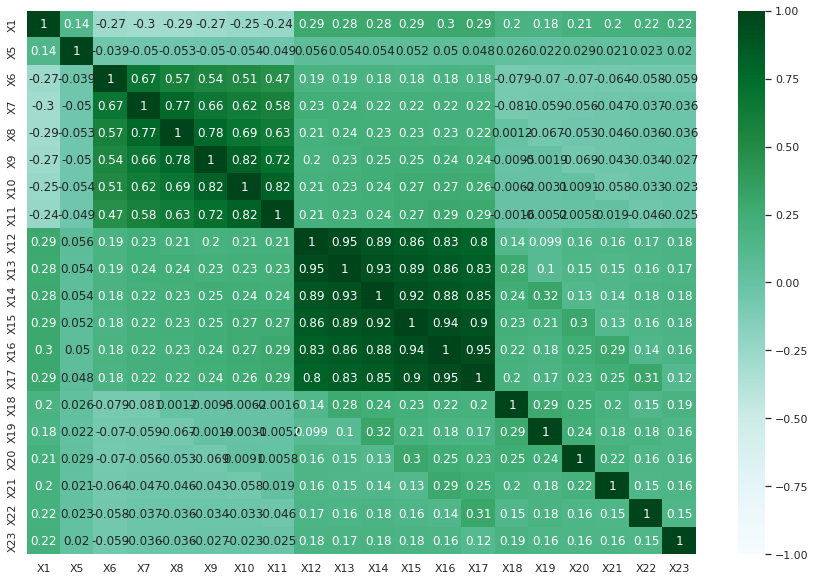

In [28]:
corrs = df.corr()

# Importamos seaborn
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Podemos notar que los cuadritos mas oscuros o de color blanco son las que estan mayor correlacionadas.

In [29]:
#Buscamos la varianza total de todas las variables
t = df.var().sum()

#Calculamos la varianza para cada variable que estamos estudiando (todas las columnas que estan)
lista_de_varianzas = {}
for column in df.columns:
  lista_de_varianzas[column] = [((df[column].var()/t)*100)]
pd.DataFrame(lista_de_varianzas)

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,37.033433,1.868060e-07,2.779639e-09,3.153381e-09,3.147353e-09,3.003733e-09,2.820930e-09,2.906250e-09,11.94274,11.157356,10.592501,9.115061,8.140403,7.811012,0.604015,1.169584,0.682881,0.540687,0.514075,0.696252


In [30]:
print('Varianza Total \t:',t)

Varianza Total 	: 45450192701.38588


In [31]:
# Importamos StandardScalar de sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

#Son muchos valores. Así que imprimamos los primeros 5 resultados mejor.
scaled[:5]

array([[-1.13736269, -1.24628151,  1.79464177,  1.78258329, -0.69667977,
        -0.66663037, -1.53070038, -1.48651337, -0.64249667, -0.64735943,
        -0.66792529, -0.67241933, -0.66303081, -0.65271388, -0.34188963,
        -0.22713422, -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.874468  ,  1.78258329,  0.13943643,
         0.18924143,  0.23563523,  1.99391629, -0.65920548, -0.66669659,
        -0.63920112, -0.62158315, -0.6062287 , -0.59798248, -0.34188963,
        -0.21364509, -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598,  0.01523526,  0.11194994,  0.13943643,
         0.18924143,  0.23563523,  0.25370146, -0.29873773, -0.49394006,
        -0.48243607, -0.44976246, -0.41727743, -0.39174531, -0.25027025,
        -0.19195838, -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968,  0.01523526,  0.11194994,  0.13943643,
         0.18924143,  0.23563523,  0.25370146, -

In [32]:
# Se convierte la info anterior en un dataframe
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [33]:
summary = {
"Varianzas": scaled_df[df.columns.values].var()[0:20],
"Valor Min": scaled_df[df.columns.values].min()[0:20],
"Valor Max": scaled_df[df.columns.values].max()[0:20]
}

pd.DataFrame(summary, index = df.columns.values).transpose()


,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.571867,-1.764171,-1.558683,-1.532796,-1.522502,-1.530700,-1.486513,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,-0.308107,-0.314124,-0.293485
Valor Max,6.416489,4.722789,7.132861,6.794483,6.828366,7.036216,7.300978,7.214561,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,39.306732,27.590403,29.425741


Las escalas ahora si estan bien y las varianzas han quedado de una misma magnitud, por tando ahora si se puede aplicar PCA

In [35]:
# Importamos PCA
from sklearn.decomposition import PCA

pcs = PCA()
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.88252839e+00, -9.51741246e-01, -6.32893285e-01,
         1.29900905e+00, -4.46046157e-01, -3.19273312e-02,
         1.14314806e-02, -1.48971106e-01,  1.50796918e-01,
         3.03063386e+00, -6.70071392e-01, -2.12447009e-01,
         3.96801396e-01, -3.25199760e-01, -8.87708004e-01,
         5.85738283e-01, -5.44804485e-02,  2.09376987e-02,
         1.83916675e-02,  9.39057800e-03],
       [-7.49311993e-01, -2.09296048e+00,  4.89711959e-01,
         7.80920173e-01, -7.91600247e-02,  1.20027574e-01,
        -1.79911068e-01,  1.51978677e-01,  1.61433560e-01,
        -9.50278979e-01, -2.22321614e-02,  4.40820857e-01,
         2.06979098e+00, -2.33355113e-02, -2.44708651e-01,
         8.24361316e-01, -1.30007052e-01,  1.16588780e-02,
         4.12132610e-03,  8.39840530e-03],
       [-8.31213668e-01, -1.04529453e+00,  2.17017765e-02,
         1.18512377e-01, -2.81969062e-03, -1.01895804e-01,
        -1.03387371e-01,  2.88288574e-02,  6.20606599e-02,
        -1.15947772e-01,  2.8

Hacemos lo siguiente para poder visualizar 
* El % de la varianza explicada por cada componente
* El acumulado de la varianza explicada por cada componente

In [37]:
pcsSummary_df = pd.DataFrame({
  '% varianza explicada': np.round(pcs.
  explained_variance_ratio_,4) * 100,
  '% varianza acumulada': np.cumsum(pcs.
  explained_variance_ratio_) * 100
})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,32.69,32.694443
1,20.31,53.003208
2,7.54,60.545126
3,5.01,65.558363
4,4.62,70.174262
5,4.44,74.615460
6,4.37,78.984716
7,3.92,82.903495
8,3.66,86.567137
9,3.50,90.067189


In [40]:
pcs_labels = [f'COMP_{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
COMP_1,32.69,32.694443
COMP_2,20.31,53.003208
COMP_3,7.54,60.545126
COMP_4,5.01,65.558363
COMP_5,4.62,70.174262
COMP_6,4.44,74.615460
COMP_7,4.37,78.984716
COMP_8,3.92,82.903495
COMP_9,3.66,86.567137
COMP_10,3.50,90.067189


Creamos un dataframe con los valores de cada componente. Cada valor del componente se le conoce como "Peso"

In [43]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  20.000667623593813
Varianza total de los componentes:  20.000667623593834


Debemos ver la varianza entre variables de la siguiente forma:

In [46]:
total_var =scaled_df.var().sum()
pd.DataFrame({
  "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *
   100
})


,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,5.0,5.0
X5,5.0,10.0
X6,5.0,15.0
X7,5.0,20.0
X8,5.0,25.0
X9,5.0,30.0
X10,5.0,35.0
X11,5.0,40.0
X12,5.0,45.0
X13,5.0,50.0


Podemos ver que sin el metodo de PCA hubieramos tenido que utilizar 18 variables, en lugar de 10 para obtener alrededor del 90% de la variacion explicada.

### Paso 2: Interprete cada componente principal en términos de las variables originales
Ahora veamos como es la composición de cada componente arrojado por PCA. Solo nos quedaremos
con los primeros 10 componentes, ya que estos explican la mayoría de la información.

In [47]:
comps_df = pd.DataFrame(
pcs.components_.round(4), #pcs.components nos da los pesos de cada uno de los componente
columns = pcs_df.columns,
index = scaled_df.columns)

#Solo las primeras 10 columnas
#La estructura es [filas, columnas]
comps_df.iloc[:,:10]

,COMP_1,COMP_2,COMP_3,COMP_4,COMP_5,COMP_6,COMP_7,COMP_8,COMP_9,COMP_10
X1,0.0698,0.0130,0.1604,0.1932,0.1995,0.2063,0.2103,0.2058,0.3348,0.3462
X5,0.3134,0.0679,-0.3008,-0.3377,-0.3470,-0.3480,-0.3352,-0.3094,0.1399,0.1402
X6,0.0516,-0.0352,-0.0041,0.0447,0.0997,0.1367,0.1555,0.1536,-0.2242,-0.1939
X7,-0.1946,-0.9652,-0.0443,-0.0451,-0.0473,-0.0536,-0.0431,-0.0341,0.0214,0.0332
X8,-0.1355,0.1318,-0.0884,-0.1079,-0.0513,-0.0055,0.0431,0.0594,-0.0509,0.0196
X9,-0.0114,0.0200,0.0106,0.0065,-0.0239,-0.0449,-0.0131,0.0749,-0.0300,-0.0789
X10,-0.0639,0.0378,-0.0104,-0.0175,-0.0169,0.0186,0.0159,-0.0365,-0.0504,-0.0412
X11,0.0628,-0.0405,-0.0119,-0.0031,-0.0243,-0.0443,0.0854,0.0321,0.0049,-0.0422
X12,0.0207,-0.0036,0.0360,0.0227,-0.1070,-0.0015,0.0178,0.0316,0.0083,-0.1343
X13,-0.3480,0.0830,0.5655,0.3436,0.0675,-0.2372,-0.3756,-0.4095,0.0681,0.0572


De la información anterior podemos ver como cada varible original contribuye a los pesos de cada
componente.

Obtengamos los valores máximos de cada componente para ver mejor la información

In [48]:
comps_df.iloc[:,:10].abs().idxmax()

COMP_1     X14
COMP_2      X7
COMP_3     X15
COMP_4     X16
COMP_5     X18
COMP_6     X16
COMP_7     X19
COMP_8     X16
COMP_9     X17
COMP_10    X23
dtype: object

### Paso 3: Identifique valores atípicos

Ahora identificamos los valores atipicos para X1 y X5:

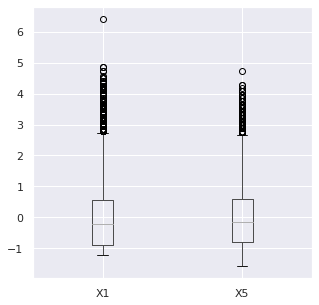

In [50]:
# Por medio de una boxplot en las variables X1 y X5:
scaled_df.boxplot(column=['X1', 'X5'], figsize=(5,5))

## Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

**¿Cuál es el número de componentes mínimo y por qué?**

El numero de componentes no sigue un comportamiento en especifico, pero la idea del PCA es que se quiten componentes hasta que la aportacion siga siendo relevante. Por ejemplo en este ejercicio con los 10 primeros componentes ya esta la informacion de todo el conjunto de datos.

**¿Cuál es la variación de los datos que representan esos componentes?**

Dado que se consideraron 10 componentes como principales, estos conformaron el 90% de la varianza acumulada.

**¿Cuál es la pérdida de información después de realizar PCA?**

Aproximadamente del 10% que seria la informacion de los 10 componentes que se obviaron, es decir en los primeros 10 componentes se encuentra el 90% de la informacion y en los otros 10 solo el 10%.

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Segun los resultados obtenidos los componentes principales serian: 
* X14 (Amount of bill statement (NT dollar))
* X7 (the repayment status in August)
* X15 (Amount of bill statement (NT dollar)) 

Los de menor importancia son:

* X17 (Amount of bill statement (NT dollar))
* X23 (amount paid in April)

Esto se puede comprobar al final del paso 2

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Teniendo en cuenta que la finalidad del PCA es reducir las dimensiones de los datos. Pues es aplicable principalmente en data sets grandes donde existen componentes de los cuales se pueda prescindir, transformado en variables mas pequenas.

Con respecto al machine learning pienso que existen modelos en los que aplicando PCA se puede tener un target mas exacto teniendo menos datos que causen disparidad.

Menos datos pero de calidad y no muchos datos inservibles